# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [294]:
#   All files have similar name ("states") followed by a number, and the extension .csv. The files contain the population of men and women
#   in the same column combined as one string, so they can't be used to make this graph just yet.

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [296]:
files = glob.glob("states*.csv")

files_list = []
for filename in files:
    data = pd.read_csv(filename)
    files_list.append(data)

us_census = pd.concat(files_list, ignore_index=True)
print(len(us_census))

60


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [297]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [298]:
us_census = us_census.drop(['Unnamed: 0'], axis=1)
print(us_census.head())

           State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0       Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   0.04%   
1  Massachusetts   6705586   11.46%  73.04%   6.83%  0.13%  5.84%   0.02%   
2       Michigan   9900571    4.63%  72.38%  17.63%  0.48%  2.42%   0.02%   
3      Minnesota   5419171    5.15%  81.43%   5.66%  1.07%  4.16%   0.03%   
4    Mississippi   2988081    2.84%  53.29%  41.49%  0.39%  0.88%   0.02%   

        Income          GenderPop  
0  $78,765.40          2872643M_F  
1  $72,838.94   3249650M_3455936F  
2  $51,201.83   4861973M_5038598F  
3  $62,820.83   2692166M_2727005F  
4  $38,909.92   1451723M_1536358F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [299]:
us_census['Income'] = us_census['Income'].str.replace('\$', '', regex=True)
us_census['Income'] = us_census['Income'].str.replace(',', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

In [300]:
print(us_census.head())
print(us_census.dtypes)


           State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0       Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   0.04%   
1  Massachusetts   6705586   11.46%  73.04%   6.83%  0.13%  5.84%   0.02%   
2       Michigan   9900571    4.63%  72.38%  17.63%  0.48%  2.42%   0.02%   
3      Minnesota   5419171    5.15%  81.43%   5.66%  1.07%  4.16%   0.03%   
4    Mississippi   2988081    2.84%  53.29%  41.49%  0.39%  0.88%   0.02%   

     Income          GenderPop  
0  78765.40         2872643M_F  
1  72838.94  3249650M_3455936F  
2  51201.83  4861973M_5038598F  
3  62820.83  2692166M_2727005F  
4  38909.92  1451723M_1536358F  
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [301]:
gender_split = us_census['GenderPop'].str.split('_')
us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)
print(us_census.head())

           State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0       Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   0.04%   
1  Massachusetts   6705586   11.46%  73.04%   6.83%  0.13%  5.84%   0.02%   
2       Michigan   9900571    4.63%  72.38%  17.63%  0.48%  2.42%   0.02%   
3      Minnesota   5419171    5.15%  81.43%   5.66%  1.07%  4.16%   0.03%   
4    Mississippi   2988081    2.84%  53.29%  41.49%  0.39%  0.88%   0.02%   

     Income          GenderPop       Men     Women  
0  78765.40         2872643M_F  2872643M         F  
1  72838.94  3249650M_3455936F  3249650M  3455936F  
2  51201.83  4861973M_5038598F  4861973M  5038598F  
3  62820.83  2692166M_2727005F  2692166M  2727005F  
4  38909.92  1451723M_1536358F  1451723M  1536358F  


In [302]:
#print(us_census['Women'][(us_census['Women'] == 'F')])
#Three rows with missing population for women. Will fill from subtracting Men from TotalPop.

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [303]:
us_census['Men'] = us_census['Men'].str.replace('M', '', regex=True)
us_census['Women'] = us_census['Women'].str.replace('F', '', regex=True)
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])
us_census = us_census.drop(['GenderPop'], axis=1)
print(us_census.head())

           State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0       Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   0.04%   
1  Massachusetts   6705586   11.46%  73.04%   6.83%  0.13%  5.84%   0.02%   
2       Michigan   9900571    4.63%  72.38%  17.63%  0.48%  2.42%   0.02%   
3      Minnesota   5419171    5.15%  81.43%   5.66%  1.07%  4.16%   0.03%   
4    Mississippi   2988081    2.84%  53.29%  41.49%  0.39%  0.88%   0.02%   

     Income      Men      Women  
0  78765.40  2872643        NaN  
1  72838.94  3249650  3455936.0  
2  51201.83  4861973  5038598.0  
3  62820.83  2692166  2727005.0  
4  38909.92  1451723  1536358.0  


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

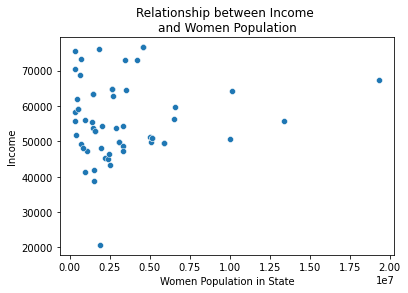

<Figure size 432x288 with 0 Axes>

In [304]:
sns.scatterplot(x='Women', y='Income', data=us_census)
plt.xlabel('Women Population in State')
plt.title('Relationship between Income \nand Women Population')
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [305]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
print(us_census['Women'].isna().sum())
us_census['Women'] = us_census['Women'].astype(int)
print(us_census.head())
print(us_census.dtypes)

0
           State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0       Maryland   5930538    8.47%  52.68%  30.68%  0.20%  5.33%   0.04%   
1  Massachusetts   6705586   11.46%  73.04%   6.83%  0.13%  5.84%   0.02%   
2       Michigan   9900571    4.63%  72.38%  17.63%  0.48%  2.42%   0.02%   
3      Minnesota   5419171    5.15%  81.43%   5.66%  1.07%  4.16%   0.03%   
4    Mississippi   2988081    2.84%  53.29%  41.49%  0.39%  0.88%   0.02%   

     Income      Men    Women  
0  78765.40  2872643  3057895  
1  72838.94  3249650  3455936  
2  51201.83  4861973  5038598  
3  62820.83  2692166  2727005  
4  38909.92  1451723  1536358  
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income      float64
Men           int64
Women         int64
dtype: object


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [306]:
print(us_census.duplicated().sum())

9


11. Drop those duplicates using the `.drop_duplicates()` function.

In [307]:
us_census = us_census.drop_duplicates()
print(len(us_census))

51


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

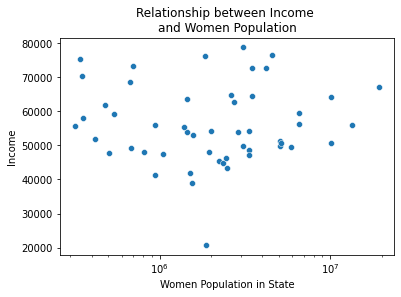

<Figure size 432x288 with 0 Axes>

In [308]:
sns.scatterplot(x='Women', y='Income', data=us_census)
plt.xlabel('Women Population in State')
plt.xscale('log')
plt.title('Relationship between Income \nand Women Population')
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [309]:
print(us_census.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [310]:
target_cols = us_census.columns[2:8]
for col in target_cols:
    us_census[col] = us_census[col].str.replace('\%', '', regex=True)
    us_census[col] = pd.to_numeric(us_census[col])

print(us_census.head())
print(us_census.dtypes)

           State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0       Maryland   5930538      8.47  52.68  30.68    0.20   5.33     0.04   
1  Massachusetts   6705586     11.46  73.04   6.83    0.13   5.84     0.02   
2       Michigan   9900571      4.63  72.38  17.63    0.48   2.42     0.02   
3      Minnesota   5419171      5.15  81.43   5.66    1.07   4.16     0.03   
4    Mississippi   2988081      2.84  53.29  41.49    0.39   0.88     0.02   

     Income      Men    Women  
0  78765.40  2872643  3057895  
1  72838.94  3249650  3455936  
2  51201.83  4861973  5038598  
3  62820.83  2692166  2727005  
4  38909.92  1451723  1536358  
State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int64
Women         int64
dtype: object


In [311]:
print(us_census['State'][(us_census['Pacific'].isna() == True)])
print(us_census.isna().sum())

11        Colorado
13          Kansas
28    North Dakota
32        Delaware
Name: State, dtype: object
State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
Income      0
Men         0
Women       0
dtype: int64


In [312]:
#Apparently, some states do not have 'Pacific' people. These will get filled with '0'
us_census['Pacific'] = us_census['Pacific'].fillna(0)
us_census['TotalRace'] = pd.to_numeric(0)

#   To check whether the races listed cover all the people in the census, I will create a 'TotalRace' column 
#   to be the sum of all column races defined previously in 'target_cols' 
for col in target_cols:
    us_census['TotalRace'] = us_census['TotalRace'] + us_census[col]

#Since the totals do not add up to 100, I will create a column with the difference named as 'Other' to account for these people
#that were not captured by the previous categories
us_census.insert(8, 'Other', 0, allow_duplicates=True)
us_census['Other'] = 100 - us_census['TotalRace']

print(us_census.head())

           State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0       Maryland   5930538      8.47  52.68  30.68    0.20   5.33     0.04   
1  Massachusetts   6705586     11.46  73.04   6.83    0.13   5.84     0.02   
2       Michigan   9900571      4.63  72.38  17.63    0.48   2.42     0.02   
3      Minnesota   5419171      5.15  81.43   5.66    1.07   4.16     0.03   
4    Mississippi   2988081      2.84  53.29  41.49    0.39   0.88     0.02   

   Other    Income      Men    Women  TotalRace  
0   2.60  78765.40  2872643  3057895      97.40  
1   2.68  72838.94  3249650  3455936      97.32  
2   2.44  51201.83  4861973  5038598      97.56  
3   2.50  62820.83  2692166  2727005      97.50  
4   1.09  38909.92  1451723  1536358      98.91  


Index(['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Other'], dtype='object')
Hispanic     8.47
White       52.68
Black       30.68
Native        0.2
Asian        5.33
Pacific      0.04
Other         2.6
Name: 0, dtype: object


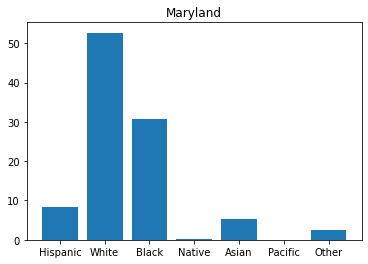

<Figure size 432x288 with 0 Axes>

In [313]:
target_cols = us_census.columns[2:9]
print(target_cols)
print(us_census.loc[0][2:9])

#plt.hist(us_census['State'][0], target_cols, data=us_census.loc[0])
plt.bar(target_cols, us_census.loc[0][2:9])
plt.title(us_census['State'][0])
plt.show()
plt.clf()


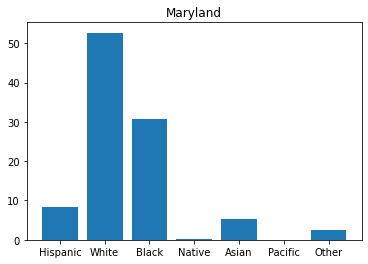

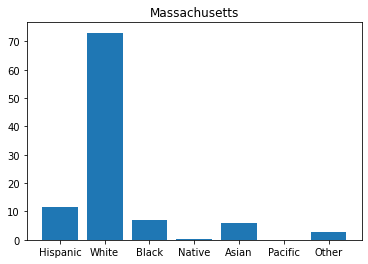

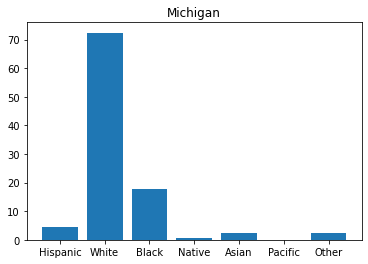

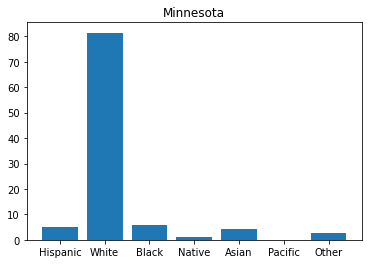

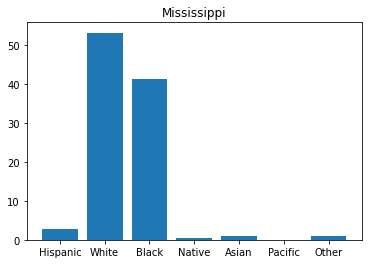

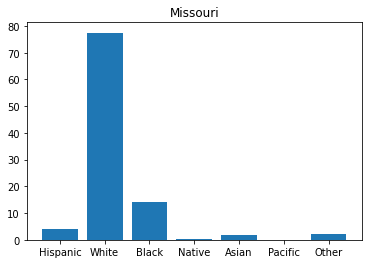

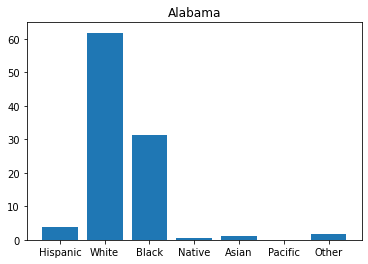

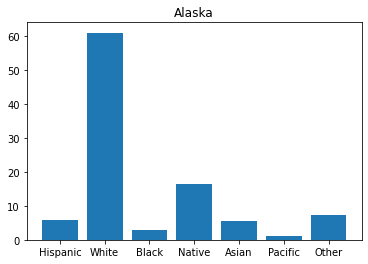

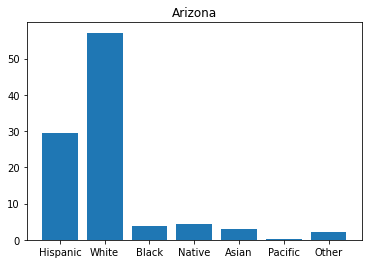

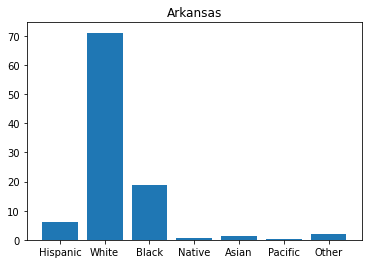

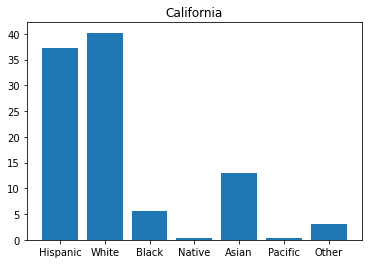

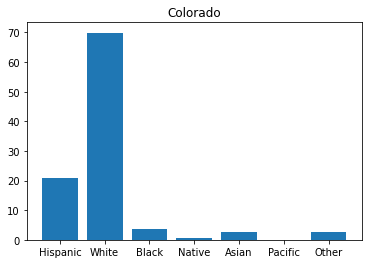

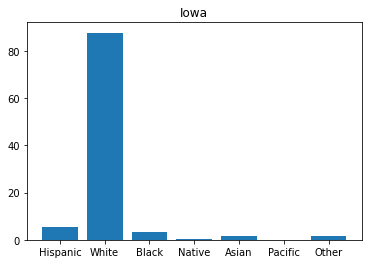

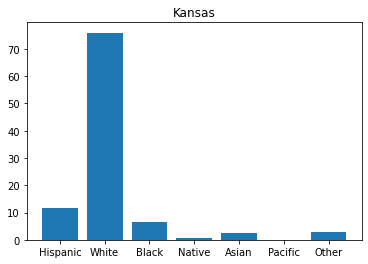

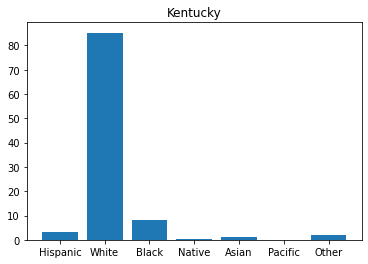

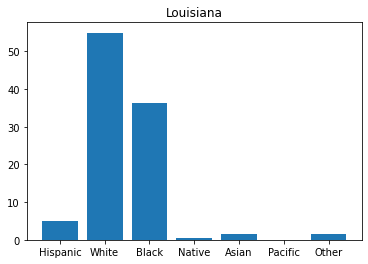

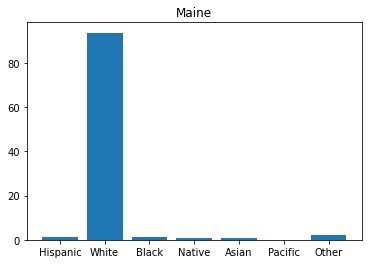

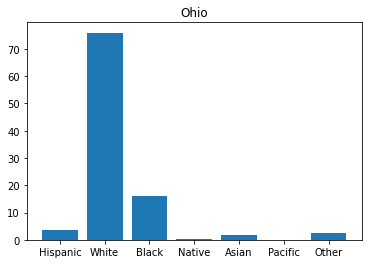

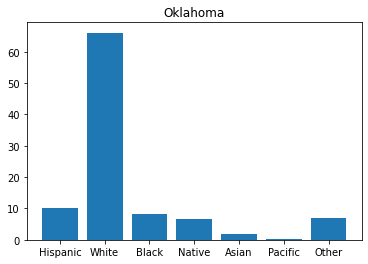

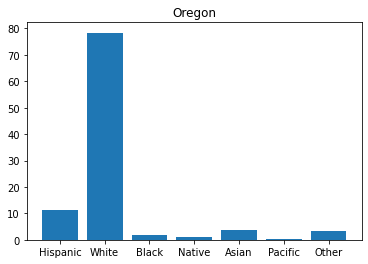

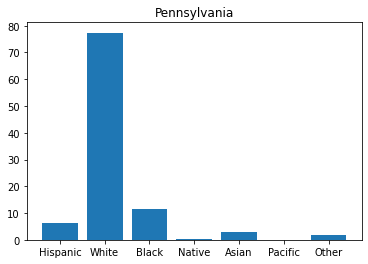

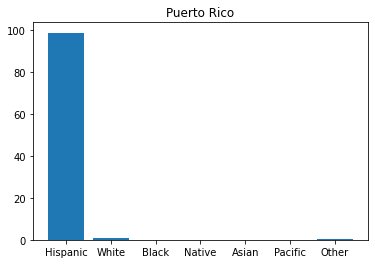

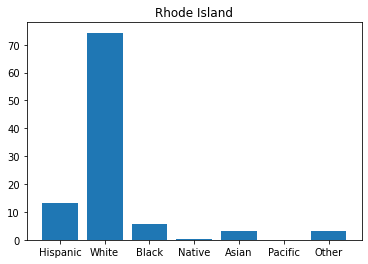

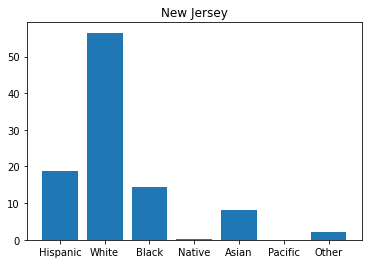

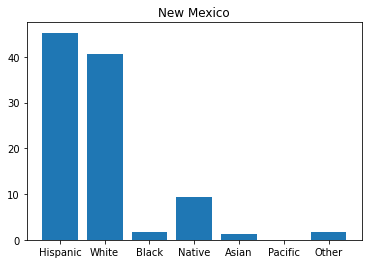

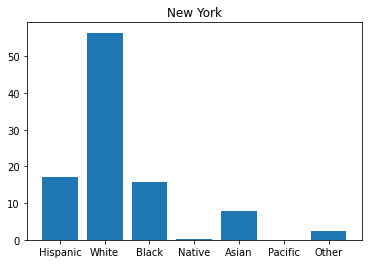

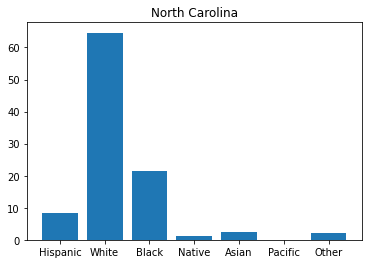

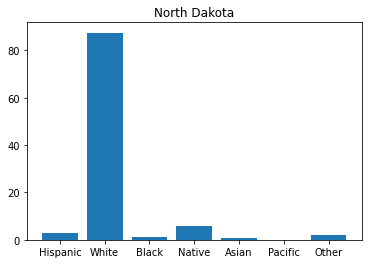

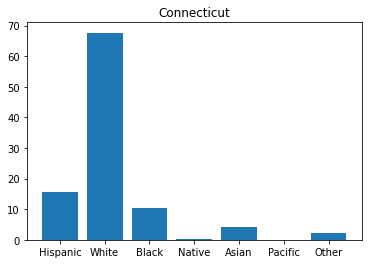

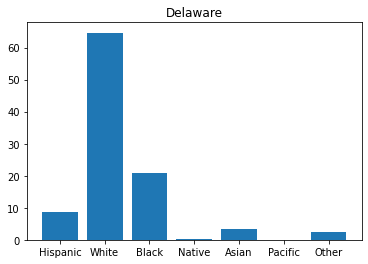

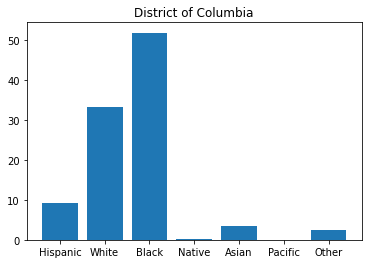

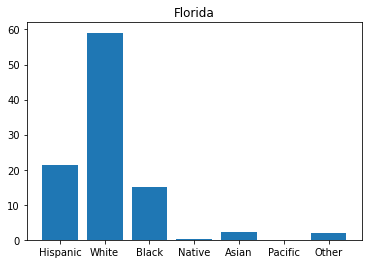

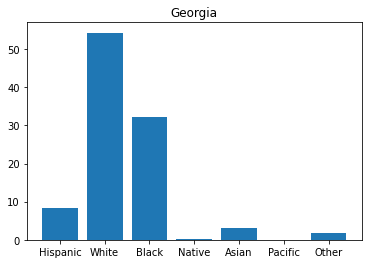

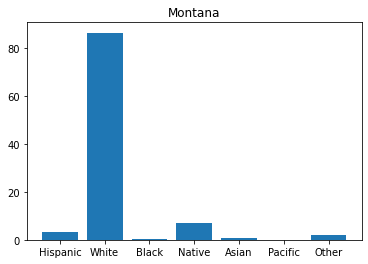

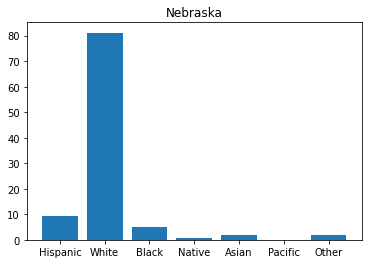

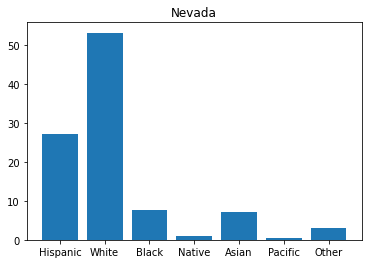

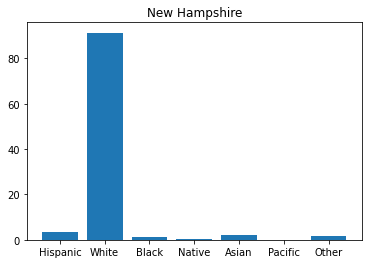

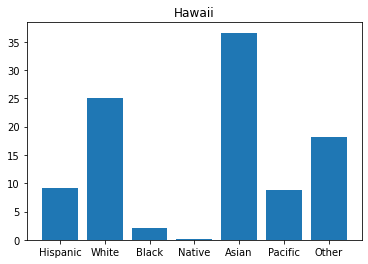

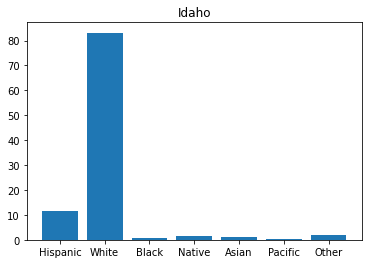

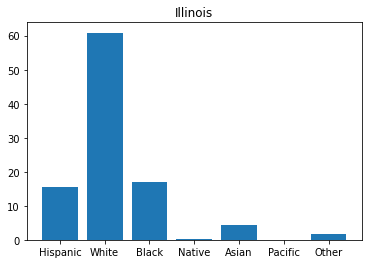

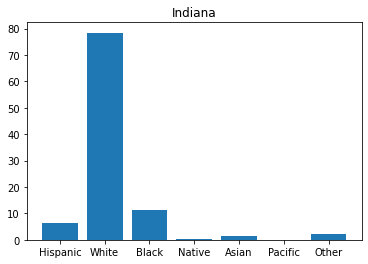

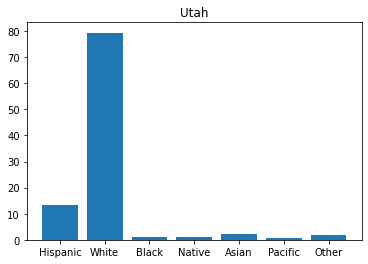

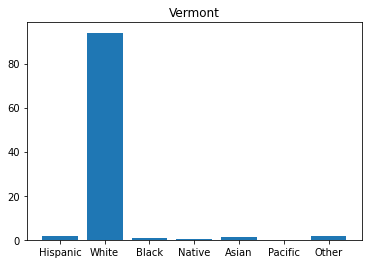

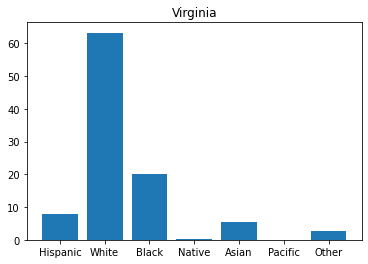

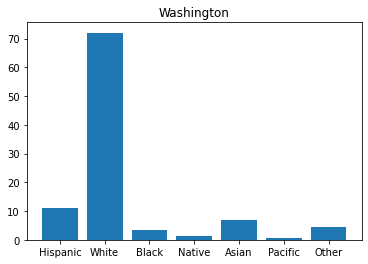

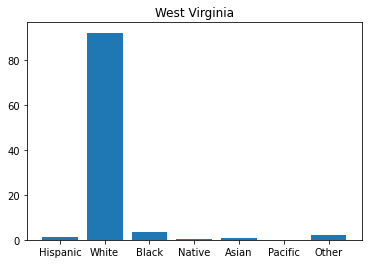

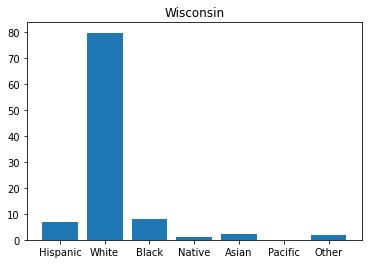

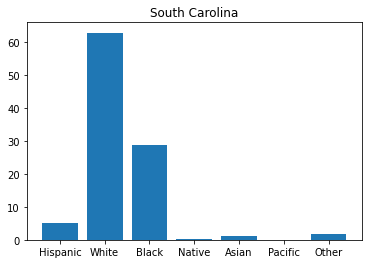

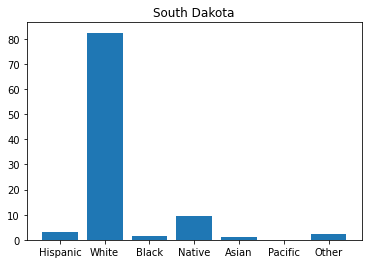

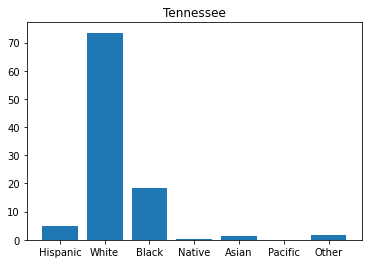

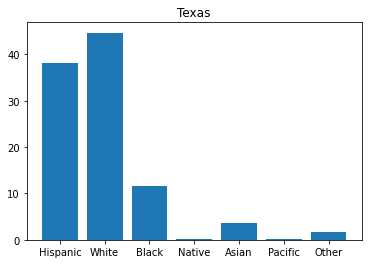

<Figure size 432x288 with 0 Axes>

In [318]:
#Time to create the histograms for each state!
states = us_census['State'].keys()

for state in states:
    plt.bar(target_cols, us_census.loc[state][2:9])
    plt.title(us_census.loc[state][0])
    plt.show()
    plt.clf()

In [317]:
print(us_census['State'].keys())

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 37,
            38, 39, 40, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57,
            58],
           dtype='int64')


## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.